In [1]:
#shear_viscosity.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 11 July 2018.
#compare evolutions

In [2]:
#restore output
dirs = ['0.0000/', '0.0025/', '0.003/', '0.0035/', '0.005/', '0.01/', '0.025/']
from helper_fns import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, lambda0, monitor = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*shear_viscosity)
    print 'output_folder = ', output_folder
    print 'shear_viscosity = ', shear_viscosity
    print 'r.shape = ', r.shape
    print 'viscous_timescale = ', viscous_timescale
    times_viscous = times/viscous_timescale
    everything += [(r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous)]

output_folder =  0.0000/output
shear_viscosity =  2.5e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  3000.0
output_folder =  0.0025/output
shear_viscosity =  2.5e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  3000.0
output_folder =  0.003/output
shear_viscosity =  2.5e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  3000.0
output_folder =  0.0035/output
shear_viscosity =  2.5e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  3000.0
output_folder =  0.005/output
shear_viscosity =  2.5e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  3000.0
output_folder =  0.01/output
shear_viscosity =  2.5e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  3000.0
output_folder =  0.025/output
shear_viscosity =  2.5e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  3000.0


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale
print 'times_viscous.max() = ', times_viscous.max()

viscous_timescale =  2999.9999999999995
times_viscous.max() =  150.00000000000003


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

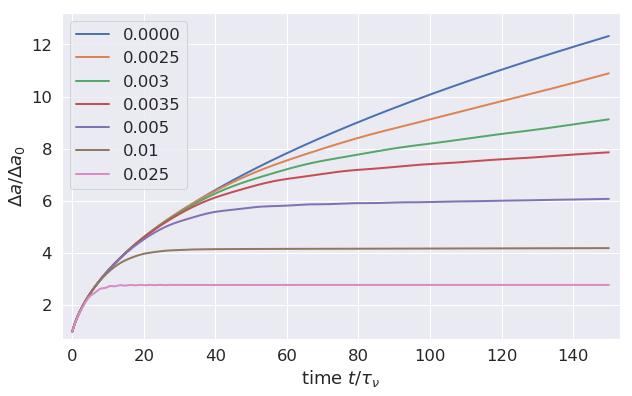

In [5]:
#plot delta_a versus time
from libration import *
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    da_init = da[0]
    x = times_viscous
    y = da/da_init
    linewidth = 2
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1])
p = ax.set_ylabel(r'$\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(0.7, 13.2)
p = ax.set_xlim(-3, 153)
p = plt.legend()
plt.savefig('figs/e0.pdf', bbox_inches='tight')

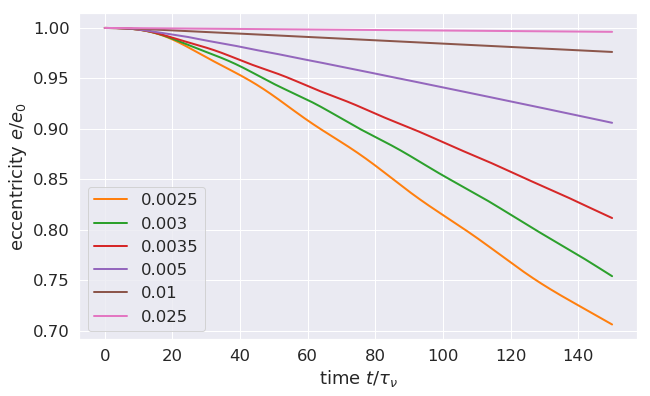

In [6]:
#plot eccentricity versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    linewidth = 2
    color = color_seq[idx]
    if (e_mean[0] > 1.0e-6):
        x = times_viscous
        y = e_mean/e_mean[0]
        p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1], color=color)
p = ax.set_ylabel(r'eccentricity $e/e_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='lower left')

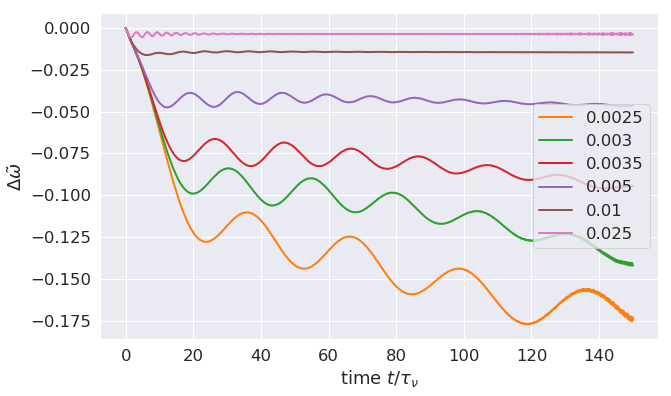

In [7]:
#plot dwt versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    linewidth = 2
    color = color_seq[idx]
    if (e_mean[0] > 1.0e-6):
        x = times_viscous
        y = dwt
        p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1], color=color)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = plt.legend(loc='center right')

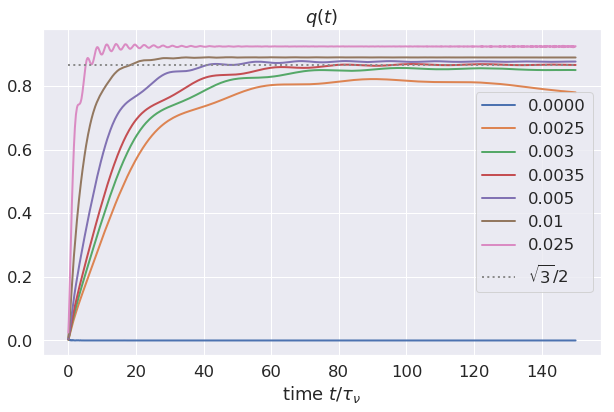

In [8]:
#plot q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    linewidth = 2
    x = times_viscous
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1])
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_title(r'$q(t)$')
p = plt.legend(loc='center right')

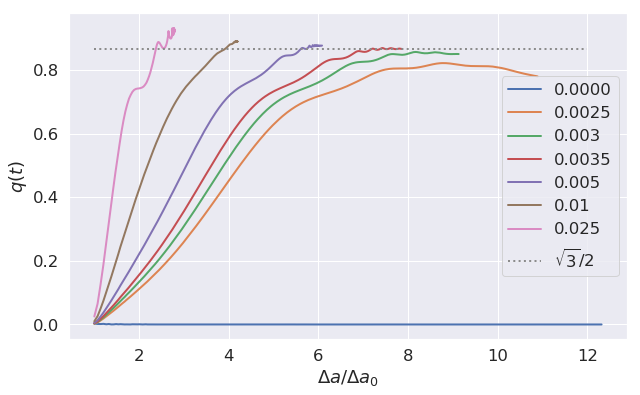

In [9]:
#plot q versus da
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    linewidth = 2
    x = da/da[0]
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1])
x = np.array([1,12])
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_xlabel(r'$\Delta a/\Delta a_0$')
p = ax.set_ylabel(r'$q(t)$')
p = plt.legend(loc='center right')

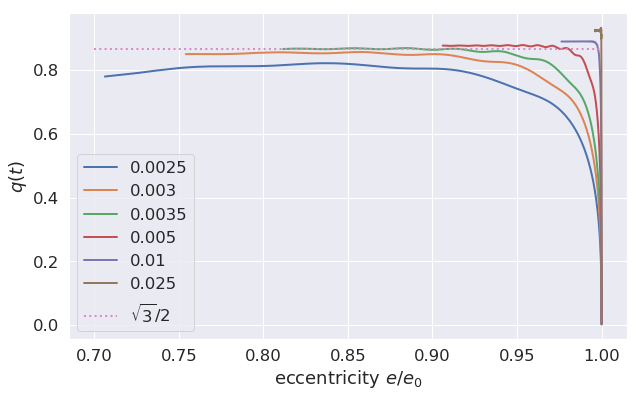

In [10]:
#plot q versus da
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, a, e, wt)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    linewidth = 2
    color = color_seq[idx]
    if (e_mean[0] > 1.0e-6):
        x = e_mean/e_mean[0]
        y = q
        p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1])
x = np.array([0.7, 1.0])
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_xlabel(r'eccentricity $e/e_0$')
p = ax.set_ylabel(r'$q(t)$')
p = plt.legend(loc='lower left')